References :   
http://www.albertauyeung.com/post/python-matrix-factorization/

In [1]:
import pyarrow as pa
import pyarrow.parquet as pq
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
# program_df = pd.read_csv("/Users/krishna/Dropbox/Data/Data/Program/correct File/csvwithHeaders/part-00000-024e4c6e-680c-49e1-8e20-667765b52332-c000.csv")
CF_test_run = pq.read_table("/Users/krishna/BDA03/AllSpark_Workspace/Project_Analysis/CF_test_data.parquet")
CF_test_run_df = CF_test_run.to_pandas()
CF_test_run_df.replace("NULL", np.nan,inplace=True)
CF_test_run_df.replace(np.nan, 0,inplace=True)
CF_test_run_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180173 entries, 0 to 180172
Data columns (total 7 columns):
SK_DEVICE_ID          180173 non-null int64
AGT_WATCH_RATIO       180173 non-null float64
FIUP_WATCH_RATIO      180173 non-null float64
TBBT_WATCH_RATIO      180173 non-null float64
ELLEN_WATCH_RATIO     180173 non-null float64
NCIS_WATCH_RATIO      180173 non-null float64
NCISLA_WATCH_RATIO    180173 non-null float64
dtypes: float64(6), int64(1)
memory usage: 9.6 MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a32138748>,
      dtype=object)

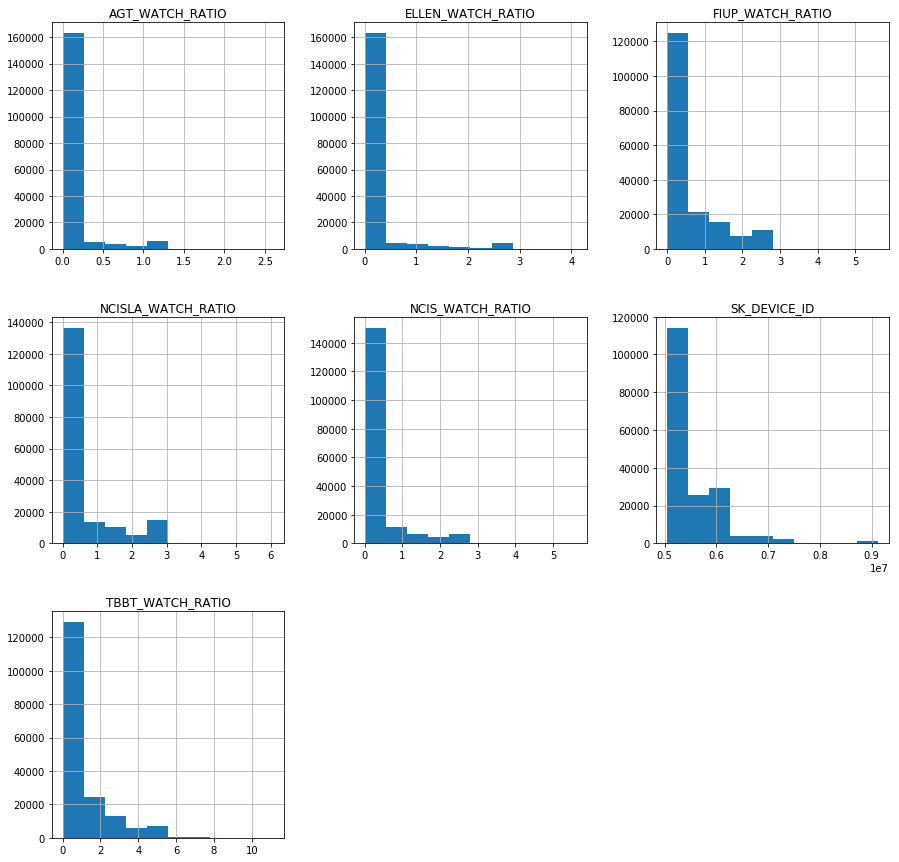

In [53]:
CF_test_run_df.hist(figsize=(15,15))

In [54]:
CF_test_run_df.ELLEN_WATCH_RATIO = [1 if i>1 else i for i in CF_test_run_df.ELLEN_WATCH_RATIO]
CF_test_run_df.AGT_WATCH_RATIO = [1 if i>1 else i for i in CF_test_run_df.AGT_WATCH_RATIO]
CF_test_run_df.FIUP_WATCH_RATIO = [1 if i>1 else i for i in CF_test_run_df.FIUP_WATCH_RATIO]
CF_test_run_df.TBBT_WATCH_RATIO = [1 if i>1 else i for i in CF_test_run_df.TBBT_WATCH_RATIO]
CF_test_run_df.NCIS_WATCH_RATIO = [1 if i>1 else i for i in CF_test_run_df.NCIS_WATCH_RATIO]
CF_test_run_df.NCISLA_WATCH_RATIO = [1 if i>1 else i for i in CF_test_run_df.NCISLA_WATCH_RATIO]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a26145e48>,
      dtype=object)

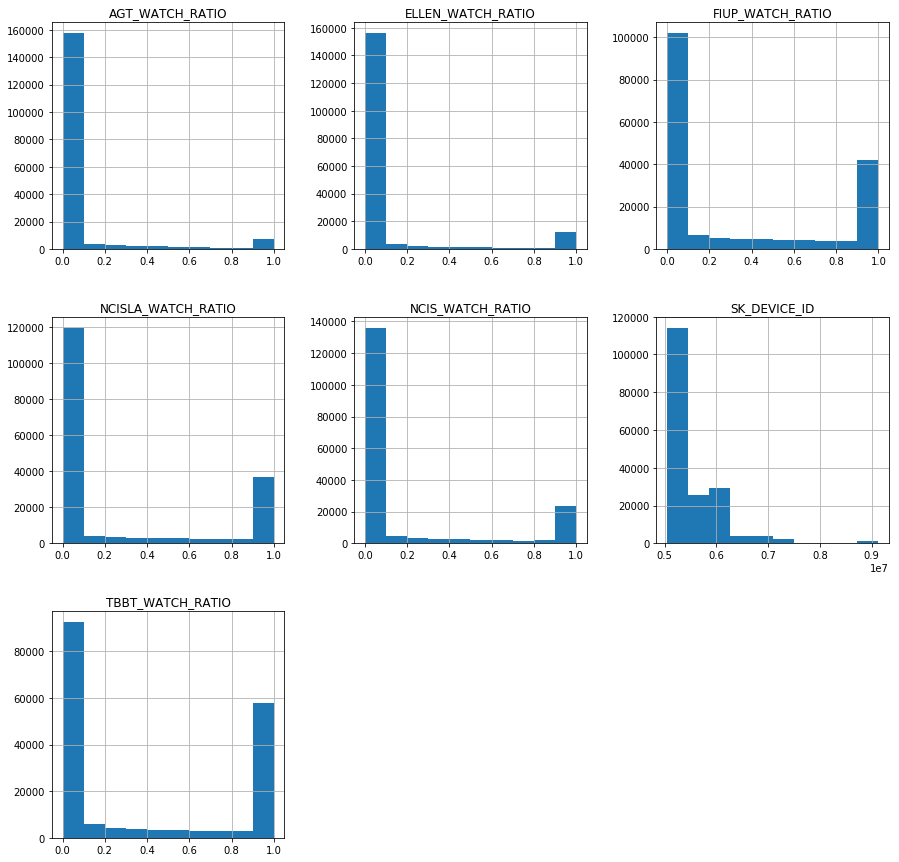

In [55]:
CF_test_run_df.hist(figsize=(15,15))

In [56]:
CF_test_run_df.set_index('SK_DEVICE_ID',inplace=True)

In [103]:
CF_test_run_df['Test']=np.zeros(len(CF_test_run_df))

In [104]:
CF_test_run_df.head()

,AGT_WATCH_RATIO,FIUP_WATCH_RATIO,TBBT_WATCH_RATIO,ELLEN_WATCH_RATIO,NCIS_WATCH_RATIO,NCISLA_WATCH_RATIO,Test
SK_DEVICE_ID,,,,,,,
5985631,0.213333,0.127889,1.000000,1.000000,0.000000,0.000000,0.0
5112431,0.000000,0.701496,0.373656,0.000000,0.016667,1.000000,0.0
5144631,0.000000,0.384003,0.248795,0.000000,0.000000,0.324368,0.0
5173431,0.026319,0.203796,0.346412,0.023056,0.260694,0.487092,0.0
5439831,0.045355,0.110079,0.417500,0.177111,0.000000,0.061944,0.0


In [131]:
np.array(CF_test_run_df)[10, 6]

0.0

In [133]:
# np.random.normal(scale=1./10, size=(20, 10))
# np.zeros(10)
[ (i, j, np.array(CF_test_run_df)[i, j])
            for i in range(20)
            for j in range(len(CF_test_run_df.columns))
            if np.array(CF_test_run_df)[i, j] > 0
        ]

# range(len(CF_test_run_df.columns))

[(0, 0, 0.21333333333333335),
 (0, 1, 0.12788888888888889),
 (0, 2, 1.0),
 (0, 3, 1.0),
 (1, 1, 0.7014957264957264),
 (1, 2, 0.3736559139784946),
 (1, 4, 0.016666666666666666),
 (1, 5, 1.0),
 (2, 1, 0.3840032679738562),
 (2, 2, 0.24879518072289156),
 (2, 5, 0.32436781609195403),
 (3, 0, 0.026319444444444444),
 (3, 1, 0.2037962962962963),
 (3, 2, 0.34641215977377166),
 (3, 3, 0.023055555555555555),
 (3, 4, 0.26069444444444445),
 (3, 5, 0.4870921985815603),
 (4, 0, 0.04535493827160494),
 (4, 1, 0.11007936507936508),
 (4, 2, 0.4175),
 (4, 3, 0.1771111111111111),
 (4, 5, 0.06194444444444445),
 (5, 1, 0.29083333333333333),
 (5, 4, 1.0),
 (5, 5, 1.0),
 (6, 1, 0.27878968253968256),
 (7, 2, 1.0),
 (7, 4, 1.0),
 (7, 5, 0.6027777777777777),
 (8, 1, 1.0),
 (8, 2, 1.0),
 (8, 4, 1.0),
 (9, 1, 0.44051724137931036),
 (9, 2, 0.2021505376344086),
 (9, 5, 1.0),
 (10, 0, 0.04069444444444444),
 (10, 1, 0.7457407407407407),
 (10, 2, 0.6243929359823399),
 (10, 3, 0.5300462962962963),
 (10, 4, 0.021111111111

In [134]:
# References :   
# http://www.albertauyeung.com/post/python-matrix-factorization/

import numpy as np

class MF():

    def __init__(self, R, K, alpha, beta, iterations):
        """
        Perform matrix factorization to predict empty
        entries in a matrix.

        Arguments
        - R (ndarray)   : user-item rating matrix
        - K (int)       : number of latent dimensions
        - alpha (float) : learning rate
        - beta (float)  : regularization parameter
        """

        self.R = R
        self.num_users, self.num_items = R.shape
        self.K = K
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations

    def train(self):
        # Initialize user and item latent feature matrice
        self.P = np.random.normal(scale=1./self.K, size=(self.num_users, self.K))
        self.Q = np.random.normal(scale=1./self.K, size=(self.num_items, self.K))

        # Initialize the biases
        self.b_u = np.zeros(self.num_users)
        self.b_i = np.zeros(self.num_items)
        self.b = np.mean(self.R[np.where(self.R != 0)])

        # Create a list of training samples
        self.samples = [
            (i, j, self.R[i, j])
            for i in range(self.num_users)
            for j in range(self.num_items)
            if self.R[i, j] > 0
        ]

        # Perform stochastic gradient descent for number of iterations
        training_process = []
        for i in range(self.iterations):
            np.random.shuffle(self.samples)
            self.sgd()
            mse = self.mse()
            training_process.append((i, mse))
            if (i+1) % 10 == 0:
                print("Iteration: %d ; error = %.4f" % (i+1, mse))

        return training_process

    def mse(self):
        """
        A function to compute the total mean square error
        """
        xs, ys = self.R.nonzero()
        predicted = self.full_matrix()
        error = 0
        for x, y in zip(xs, ys):
            error += pow(self.R[x, y] - predicted[x, y], 2)
        return np.sqrt(error)

    def sgd(self):
        """
        Perform stochastic graident descent
        """
        for i, j, r in self.samples:
            # Computer prediction and error
            prediction = self.get_rating(i, j)
            e = (r - prediction)

            # Update biases
            self.b_u[i] += self.alpha * (e - self.beta * self.b_u[i])
            self.b_i[j] += self.alpha * (e - self.beta * self.b_i[j])

            # Update user and item latent feature matrices
            self.P[i, :] += self.alpha * (e * self.Q[j, :] - self.beta * self.P[i,:])
            self.Q[j, :] += self.alpha * (e * self.P[i, :] - self.beta * self.Q[j,:])

    def get_rating(self, i, j):
        """
        Get the predicted rating of user i and item j
        """
        prediction = self.b + self.b_u[i] + self.b_i[j] + self.P[i, :].dot(self.Q[j, :].T)
        return prediction

    def full_matrix(self):
        """
        Computer the full matrix using the resultant biases, P and Q
        """
        return self.b + self.b_u[:,np.newaxis] + self.b_i[np.newaxis:,] + self.P.dot(self.Q.T)
    
    def return_latent_matrices(self):
        """
        return latent matrices P & Q for further calculations - to merge with topic modelling
        """
        return self.P , self.Q

In [79]:
# CF_test_run_df[0:10000]

In [152]:
?np.newaxis

In [135]:
R = np.array(CF_test_run_df)

mf = MF(R, K=10, alpha=0.1, beta=0.01, iterations=10)

In [136]:
mf.train()

Iteration: 10 ; error = 54.1139


[(0, 210.0046490944982),
 (1, 191.00455278313433),
 (2, 174.08509501110728),
 (3, 148.07505545962334),
 (4, 125.15463741170832),
 (5, 106.34426521103418),
 (6, 92.68705723679815),
 (7, 76.20046652851103),
 (8, 64.55461653337797),
 (9, 54.11391244285317)]

In [137]:
mf.mse()

54.11391244285317

In [138]:
mf.full_matrix()[1:4]

array([[ 0.27823642,  0.64134727,  0.54465255,  0.5010125 ,  0.13141298,
         0.91230816,  0.48644467],
       [ 0.12150599,  0.36924754,  0.30662022,  0.22203264,  0.46872241,
         0.38386046,  0.34317034],
       [-0.05847615,  0.21325966,  0.38696922,  0.10094884,  0.33856645,
         0.55136183,  0.29911074]])

In [139]:
CF_test_run_df[:3]

,AGT_WATCH_RATIO,FIUP_WATCH_RATIO,TBBT_WATCH_RATIO,ELLEN_WATCH_RATIO,NCIS_WATCH_RATIO,NCISLA_WATCH_RATIO,Test
SK_DEVICE_ID,,,,,,,
5985631,0.213333,0.127889,1.000000,1.0,0.000000,0.000000,0.0
5112431,0.000000,0.701496,0.373656,0.0,0.016667,1.000000,0.0
5144631,0.000000,0.384003,0.248795,0.0,0.000000,0.324368,0.0


In [143]:
P,Q = mf.return_latent_matrices()

In [144]:
P.shape

(180173, 10)

In [147]:
Q.T.shape

(10, 7)

In [140]:
mf.sgd()

In [141]:
mf.full_matrix()

array([[0.34419637, 0.36755993, 0.81451434, ..., 0.8398502 , 0.59273177,
        0.68519676],
       [0.27836164, 0.65628745, 0.52149806, ..., 0.12233413, 0.92389209,
        0.48138442],
       [0.12492207, 0.37450858, 0.30356259, ..., 0.46383471, 0.37772208,
        0.34190463],
       ...,
       [0.61521214, 0.97260845, 1.14388872, ..., 0.56810215, 0.93635712,
        0.79398746],
       [0.42263849, 0.44607587, 0.81070997, ..., 0.49532019, 0.69224672,
        0.55421718],
       [0.35942165, 0.36730414, 0.64397268, ..., 0.43878879, 0.68909788,
        0.50121016]])